In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("co2_mm_mlo.txt", sep = r"\s*", skiprows = 72, 
                 header = None, 
                 names = ['Year', 'Month', 'Inferred_Date', 
                            'CO2_average_ppm', 'Interpolated_CO2_ppm', 'seasonal_trend',
                            'days'])



/Users/anthonyschams/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/Users/anthonyschams/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/anthonyschams/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [4]:
df['Day'] = 15
df['CO2'] = np.where(df.CO2_average_ppm == -99.99, np.nan, df.CO2_average_ppm)

In [6]:
df2 = pd.get_dummies(df, columns=['Year', 'Month'])

In [7]:
def normalize_column(df, col_name):
    subset = df[col_name]
    normalized = (subset - np.mean(subset)) / np.std(subset)
    return normalized

In [10]:
normalize_column(df, 'CO2').tail()

730    2.019378
731    2.052388
732    2.060282
733    2.108722
734    2.156802
Name: CO2, dtype: float64

In [3]:
suicide = pd.read_csv("suicides.csv")

In [14]:
suicide.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [13]:
suicide.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [19]:
suicide.loc[:,[ 'year', 'age', 'generation']].groupby(['year', 'age', 'generation']).count()

Empty DataFrame
Columns: []
Index: [(1985, 15-24 years, Generation X), (1985, 25-34 years, Boomers), (1985, 35-54 years, Silent), (1985, 5-14 years, Generation X), (1985, 55-74 years, G.I. Generation), (1985, 75+ years, G.I. Generation), (1986, 15-24 years, Generation X), (1986, 25-34 years, Boomers), (1986, 35-54 years, Silent), (1986, 5-14 years, Generation X), (1986, 55-74 years, G.I. Generation), (1986, 75+ years, G.I. Generation), (1987, 15-24 years, Generation X), (1987, 25-34 years, Boomers), (1987, 35-54 years, Silent), (1987, 5-14 years, Generation X), (1987, 55-74 years, G.I. Generation), (1987, 75+ years, G.I. Generation), (1988, 15-24 years, Generation X), (1988, 25-34 years, Boomers), (1988, 35-54 years, Silent), (1988, 5-14 years, Generation X), (1988, 55-74 years, G.I. Generation), (1988, 75+ years, G.I. Generation), (1989, 15-24 years, Generation X), (1989, 25-34 years, Boomers), (1989, 35-54 years, Silent), (1989, 5-14 years, Generation X), (1989, 55-74 years, G.I. Generation), (1989, 75+ years, G.I. Generation), (1990, 15-24 years, Generation X), (1990, 25-34 years, Boomers), (1990, 35-54 years, Silent), (1990, 5-14 years, Generation X), (1990, 55-74 years, G.I. Generation), (1990, 75+ years, G.I. Generation), (1991, 15-24 years, Generation X), (1991, 25-34 years, Boomers), (1991, 35-54 years, Boomers), (1991, 5-14 years, Millenials), (1991, 55-74 years, Silent), (1991, 75+ years, G.I. Generation), (1992, 15-24 years, Generation X), (1992, 25-34 years, Boomers), (1992, 35-54 years, Boomers), (1992, 5-14 years, Millenials), (1992, 55-74 years, Silent), (1992, 75+ years, G.I. Generation), (1993, 15-24 years, Generation X), (1993, 25-34 years, Boomers), (1993, 35-54 years, Boomers), (1993, 5-14 years, Millenials), (1993, 55-74 years, Silent), (1993, 75+ years, G.I. Generation), (1994, 15-24 years, Generation X), (1994, 25-34 years, Boomers), (1994, 35-54 years, Boomers), (1994, 5-14 years, Millenials), (1994, 55-74 years, Silent), (1994, 75+ years, G.I. Generation), (1995, 15-24 years, Generation X), (1995, 25-34 years, Generation X), (1995, 35-54 years, Boomers), (1995, 5-14 years, Millenials), (1995, 55-74 years, Silent), (1995, 75+ years, G.I. Generation), (1996, 15-24 years, Generation X), (1996, 25-34 years, Generation X), (1996, 35-54 years, Boomers), (1996, 5-14 years, Millenials), (1996, 55-74 years, Silent), (1996, 75+ years, G.I. Generation), (1997, 15-24 years, Generation X), (1997, 25-34 years, Generation X), (1997, 35-54 years, Boomers), (1997, 5-14 years, Millenials), (1997, 55-74 years, Silent), (1997, 75+ years, G.I. Generation), (1998, 15-24 years, Generation X), (1998, 25-34 years, Generation X), (1998, 35-54 years, Boomers), (1998, 5-14 years, Millenials), (1998, 55-74 years, Silent), (1998, 75+ years, G.I. Generation), (1999, 15-24 years, Generation X), (1999, 25-34 years, Generation X), (1999, 35-54 years, Boomers), (1999, 5-14 years, Millenials), (1999, 55-74 years, Silent), (1999, 75+ years, G.I. Generation), (2000, 15-24 years, Generation X), (2000, 25-34 years, Generation X), (2000, 35-54 years, Boomers), (2000, 5-14 years, Millenials), (2000, 55-74 years, Silent), (2000, 75+ years, G.I. Generation), (2001, 15-24 years, Millenials), (2001, 25-34 years, Generation X), (2001, 35-54 years, Boomers), (2001, 5-14 years, Millenials), ...]

[191 rows x 0 columns]

In [31]:
mask = suicide.apply(lambda x: x['country'][0] == 'U', axis = 1)
u_countries = suicide[mask].copy()

In [32]:
u_countries.country.unique()

array(['Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan'], dtype=object)

In [33]:
usa = u_countries[u_countries.country=='United States']

In [34]:
usa.groupby('age').sum()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
age,,,,,,
15-24 years,124000,141679,1238381995,703.45,17.832,2434716
25-34 years,124000,182047,1277625343,878.69,17.832,2434716
35-54 years,124000,380917,2371577220,994.52,17.832,2434716
5-14 years,124000,8923,1205493232,45.47,17.832,2434716
55-74 years,124000,224770,1460664960,988.47,17.832,2434716
75+ years,124000,95677,500284451,1530.37,17.832,2434716


In [35]:
u_countries.age = u_countries.age.astype('category').copy()

In [54]:
u_countries.age.cat.re

Index(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'],
      dtype='object')

In [59]:
u_countries.age = u_countries['age'].cat.reorder_categories(['5-14 years',
                                           '15-24 years', 
                                           '25-34 years', 
                                           '35-54 years',
                                           '55-74 years', 
                                           '75+ years'], ordered=True)

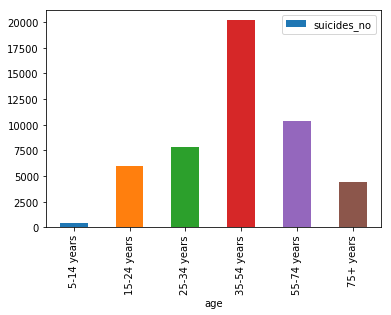

In [71]:

u_countries[u_countries.year == 2005].groupby('age').sum().plot(y='suicides_no', kind='bar')
plt.savefig("u_country_suicides_2005.png")